# Import libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



### Read CSV file

In [94]:
df=pd.read_csv("Drivers License Data.csv")

In [95]:
df.head()

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,NaN,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,NaN,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,NaN,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,NaN,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes


### Data Cleaning and Analysis

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant ID   500 non-null    object 
 1   Gender         500 non-null    object 
 2   Age Group      500 non-null    object 
 3   Race           500 non-null    object 
 4   Training       350 non-null    object 
 5   Signals        500 non-null    float64
 6   Yield          500 non-null    float64
 7   Speed Control  500 non-null    float64
 8   Night Drive    500 non-null    float64
 9   Road Signs     500 non-null    float64
 10  Steer Control  500 non-null    float64
 11  Mirror Usage   500 non-null    float64
 12  Confidence     500 non-null    float64
 13  Parking        500 non-null    float64
 14  Theory Test    500 non-null    float64
 15  Reactions      500 non-null    object 
 16  Qualified      500 non-null    object 
dtypes: float64(10), object(7)
memory usage: 66.5+ KB


In [97]:
df.isnull().sum()

Applicant ID       0
Gender             0
Age Group          0
Race               0
Training         150
Signals            0
Yield              0
Speed Control      0
Night Drive        0
Road Signs         0
Steer Control      0
Mirror Usage       0
Confidence         0
Parking            0
Theory Test        0
Reactions          0
Qualified          0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
df.dropna(axis=0, inplace=True)

In [100]:
df.drop('Applicant ID', axis=1, inplace=True )

In [101]:
df.isnull().sum()

Gender           0
Age Group        0
Race             0
Training         0
Signals          0
Yield            0
Speed Control    0
Night Drive      0
Road Signs       0
Steer Control    0
Mirror Usage     0
Confidence       0
Parking          0
Theory Test      0
Reactions        0
Qualified        0
dtype: int64

In [102]:
df.describe()

,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,54.263057,53.445171,52.973257,53.261371,53.336743,53.136914,53.603943,53.451371,54.231857,71.057429
std,13.848231,13.046442,13.167371,12.831859,13.398742,12.778165,13.047000,13.288395,12.616315,17.947159
min,11.290000,11.800000,7.630000,18.240000,20.290000,14.140000,21.850000,21.170000,12.380000,40.100000
25%,45.042500,44.695000,44.750000,44.625000,44.937500,45.190000,44.547500,44.352500,46.312500,55.142500
50%,54.320000,53.765000,52.220000,53.585000,53.135000,52.395000,53.600000,53.595000,54.180000,71.075000
75%,64.182500,62.317500,62.152500,61.840000,62.387500,61.172500,63.350000,62.055000,62.802500,86.797500
max,95.610000,94.410000,89.430000,89.930000,88.870000,89.240000,90.770000,90.280000,88.360000,99.750000


In [103]:
df['Gender'].value_counts()

Gender
Female    182
Male      168
Name: count, dtype: int64

In [104]:
df['Age Group'].value_counts()

Age Group
Young Adult    175
Middle Age      95
Teenager        80
Name: count, dtype: int64

In [105]:
table=pd.crosstab(df['Gender'],df['Age Group'])
table

Age Group,Middle Age,Teenager,Young Adult
Gender,,,
Female,48,41,93
Male,47,39,82


In [106]:
df.head(2)

,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
4,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes
5,Female,Young Adult,Other,Basic,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,Average,Yes


In [107]:
#mapping string to int 
df['Qualified'] = df['Qualified'].map({'Yes': 1, 'No': 0})
df['Gender']=df['Gender'].map({"Female": 0,"Male": 1})


In [108]:
from sklearn.preprocessing import  LabelEncoder
age=LabelEncoder()
Race=LabelEncoder()
tr=LabelEncoder()
rec=LabelEncoder()

df['Age Group']=age.fit_transform(df["Age Group"])
df['Race']=Race.fit_transform(df["Race"])
df['Training']=tr.fit_transform(df["Training"])
df['Reactions']=rec.fit_transform(df['Reactions'])

In [109]:
table2 = pd.crosstab(df['Gender'], df['Age Group'], values=df['Qualified'], aggfunc='sum')
print("Total Qualified Drivers")
table2

Total Qualified Drivers


Age Group,0,1,2
Gender,,,
0,38,18,69
1,40,17,65


## Data Visulization

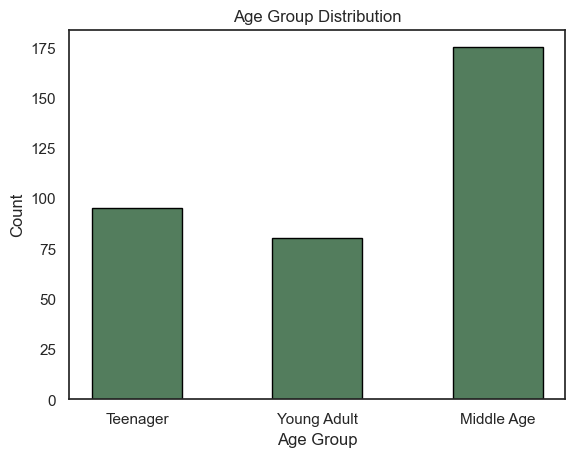

In [110]:
plt.hist(df['Age Group'], bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black', color='#537D5D', rwidth=0.5)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ["Teenager", "Young Adult", "Middle Age"])
plt.show()


C:\Users\Richee\AppData\Local\Temp\ipykernel_9364\3484461628.py:3: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



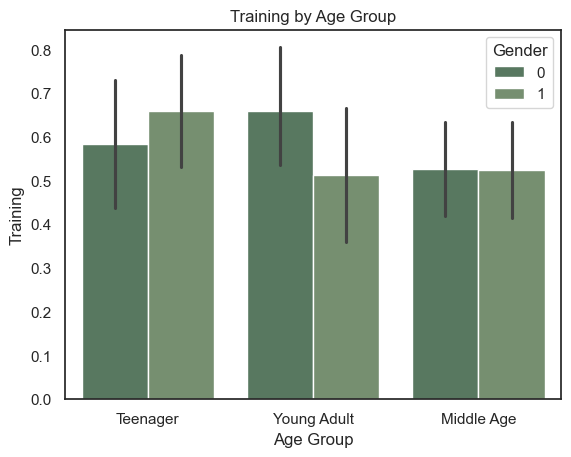

In [111]:
colors = ['#537D5D', '#73946B', '#9EBC8A'] 

sns.barplot(x="Age Group", y="Training", hue="Gender",data=df, palette=colors)
plt.xlabel("Age Group")
plt.ylabel("Training")
plt.title("Training by Age Group")
plt.xticks([0, 1, 2], ["Teenager", "Young Adult", "Middle Age"])
plt.show()


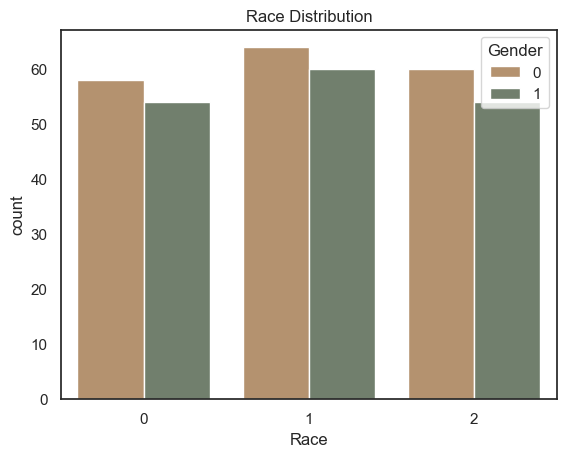

In [112]:
colors= ['#BF9264', '#6F826A']
sns.countplot(x="Race",hue="Gender",data=df,palette=colors)
plt.title("Race Distribution")
plt.show()

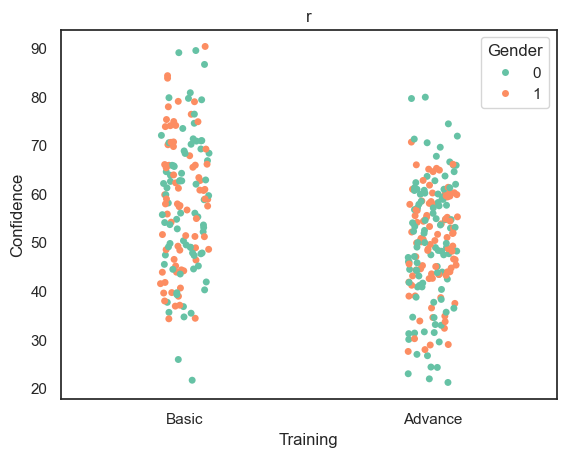

In [113]:
sns.stripplot(x="Training",y="Confidence",data=df,hue="Gender",palette="Set2")
plt.title("r")
plt.xticks([0, 1], ["Basic", "Advance"])
plt.show()

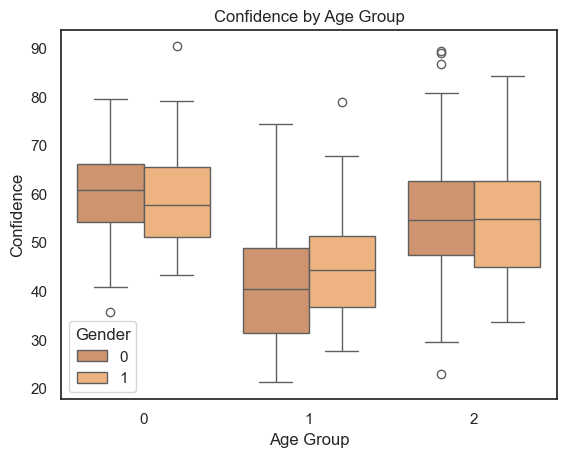

In [114]:
color2= ['#DE8F5F', '#FFB26F']
sns.boxplot(x="Age Group",y="Confidence",data=df,hue="Gender",palette=color2)
plt.title("Confidence by Age Group")
plt.show()


In [115]:
df.head()

,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
4,1,1,1,0,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,0,1
5,0,2,1,1,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,0,1
6,1,0,0,1,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,0,1
7,1,2,1,1,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,0,1
9,0,1,2,0,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,0,1


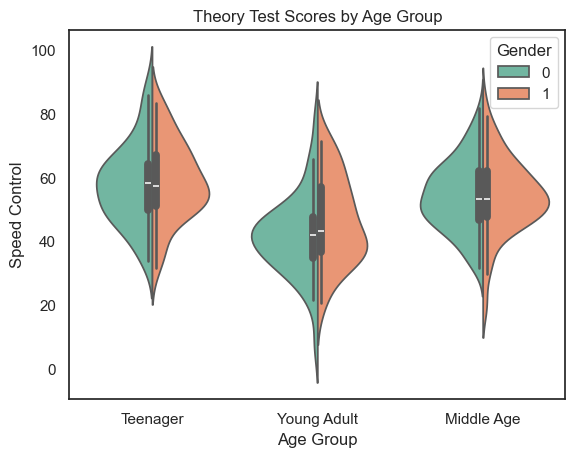

In [116]:
sns.violinplot(x="Age Group", y="Speed Control", data=df, hue="Gender", split=True, palette="Set2")
plt.title("Theory Test Scores by Age Group")
plt.xticks([0, 1, 2], ["Teenager", "Young Adult", "Middle Age"])
plt.show()

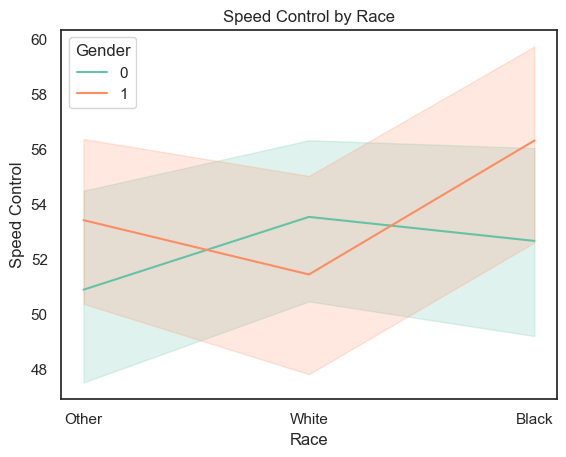

In [117]:
sns.lineplot(x="Race", y="Speed Control", data=df, hue="Gender",  palette="Set2")
plt.title("Speed Control by Race")
plt.xticks([0, 1, 2], ["Other", "White", "Black"])
plt.show()

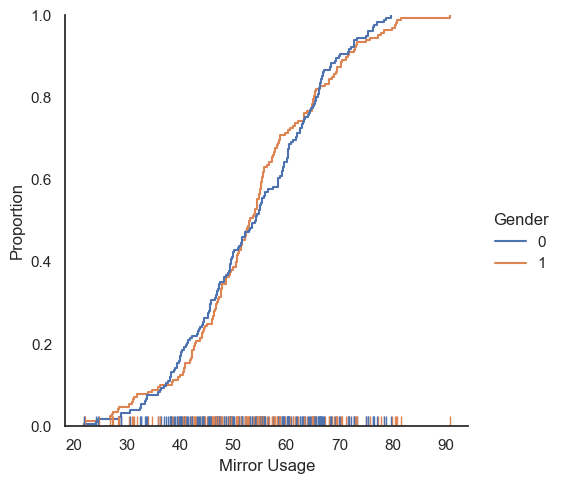

In [118]:
sns.displot(data=df, kind="ecdf", x="Mirror Usage", hue="Gender", rug=True)
plt.show()


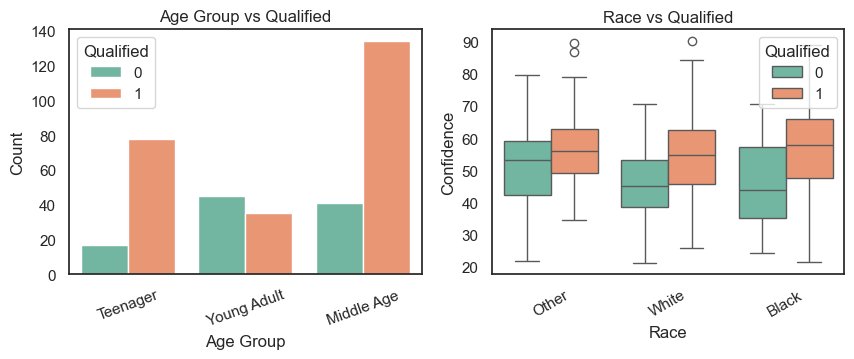

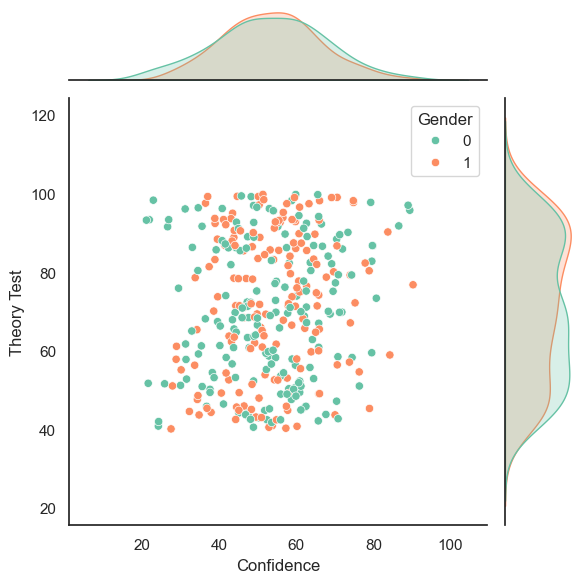

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

# Subplot 1: Age Group vs Qualified (countplot)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Age Group', hue='Qualified', palette='Set2')
plt.title("Age Group vs Qualified")
plt.xlabel("Age Group")
plt.xticks([0, 1, 2], ["Teenager", "Young Adult", "Middle Age"])
plt.ylabel("Count")
plt.xticks(rotation=20)

# Subplot 2: Race vs Qualified (countplot)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Race',y="Confidence", hue='Qualified', palette='Set2', dodge=True)
plt.title("Race vs Qualified")
plt.xlabel("Race")
plt.xticks([0, 1, 2], ["Other", "White", "Black"])
plt.ylabel("Confidence")
plt.xticks(rotation=30)

# Subplot 3: Confidence vs Qualified (stripplot)
sns.jointplot(data=df, x="Confidence", y="Theory Test", hue="Gender",palette="Set2", kind="scatter")

plt.tight_layout()
plt.show()


In [120]:
df.head()

,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
4,1,1,1,0,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,0,1
5,0,2,1,1,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,0,1
6,1,0,0,1,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,0,1
7,1,2,1,1,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,0,1
9,0,1,2,0,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,0,1


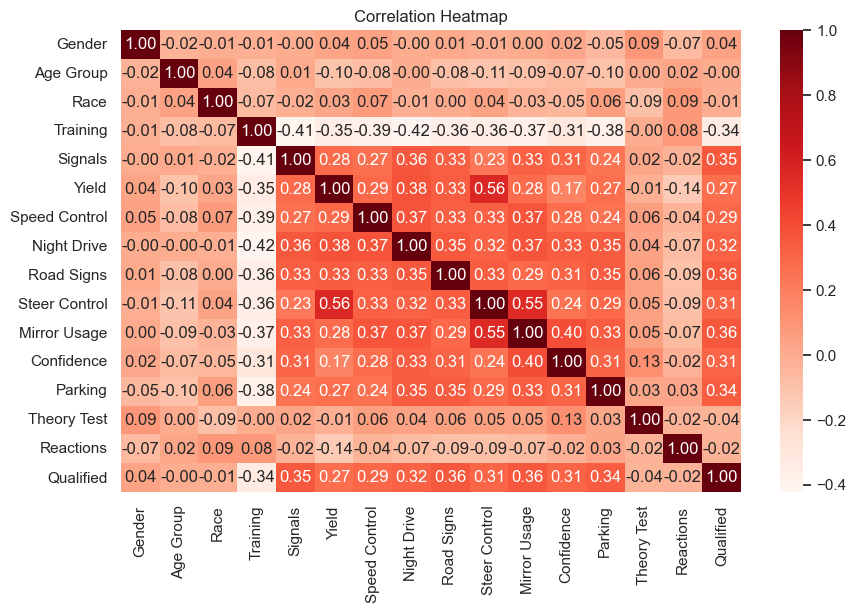

In [130]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


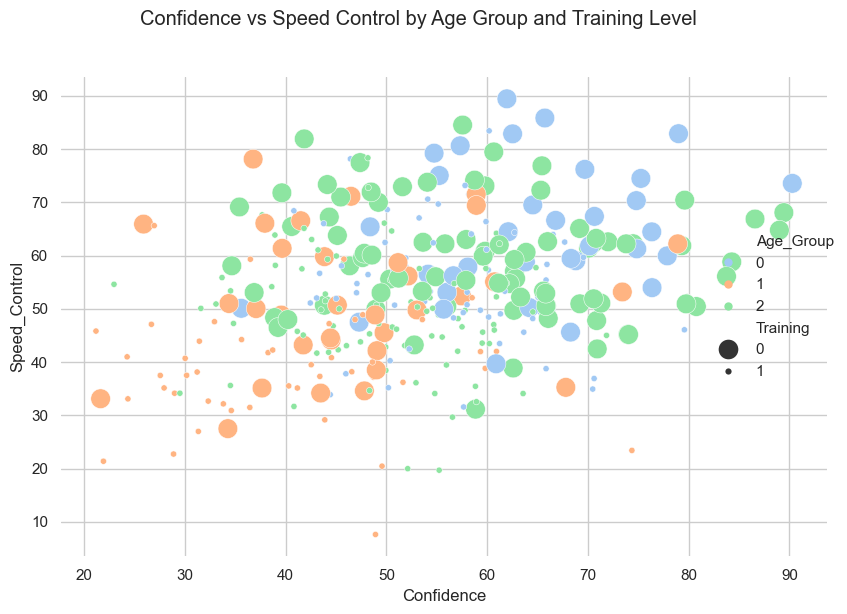

In [137]:

sns.set_theme(style="whitegrid")
df.columns = df.columns.str.strip().str.replace(" ", "_")
cmap = sns.cubehelix_palette(rot=-0.4, as_cmap=True)
g = sns.relplot(
    data=df,
    x="Confidence",
    y="Speed_Control",
    hue="Age_Group",           
    size="Training",       
    palette="pastel",  
    sizes=(20, 200),
    kind="scatter",
    height=6,
    aspect=1.2
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

g.despine(left=True, bottom=True)
plt.suptitle("Confidence vs Speed Control by Age Group and Training Level", y=1.02)
plt.tight_layout()
plt.show()


# Traning and Testing


#### Import libraries

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [140]:
x=df.drop("Qualified",axis=1)
y=df['Qualified']

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [143]:
y_pred=model.predict(x_test)

In [144]:
df.head()

,Gender,Age_Group,Race,Training,Signals,Yield,Speed_Control,Night_Drive,Road_Signs,Steer_Control,Mirror_Usage,Confidence,Parking,Theory_Test,Reactions,Qualified
4,1,1,1,0,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,0,1
5,0,2,1,1,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,0,1
6,1,0,0,1,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,0,1
7,1,2,1,1,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,0,1
9,0,1,2,0,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,0,1


In [146]:
model.predict([[1,1,1,0,78.52,83.93,59.79,52.68,67.47,89.35,30.31,43.85,56,78.44,0]])

C:\Users\Richee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1], dtype=int64)

In [150]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        26
           1       0.78      0.95      0.86        44

    accuracy                           0.80        70
   macro avg       0.83      0.75      0.76        70
weighted avg       0.81      0.80      0.79        70



<Axes: >

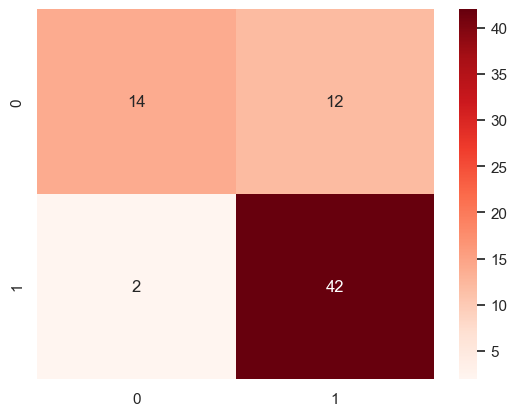

In [149]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')    

In [151]:
# Save the trained model
import pickle
with open("driving_model.pkl", "wb") as file:
    pickle.dump(model, file)
